    Nama   : Ryan Rizky Fathinanto
    Email  : ryanrizkyf@gmail.com
    No. HP : 085692475682

In [1]:
!pip install split-folders tqdm

In [2]:
import zipfile,os
import splitfolders
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-29 13:19:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  10.3MB/s    in 42s     

2021-06-29 13:20:26 (7.25 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images', 'paper']

In [6]:
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors/hasil_split', seed=1337, ratio=(.8, .2,))

Copying files: 2188 files [00:00, 4947.98 files/s]


In [7]:
base_dir = '/tmp/rockpaperscissors/hasil_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
train_paper_dir = os.path.join(train_dir, 'paper')

train_rock_dir = os.path.join(train_dir, 'rock')

train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')

validation_rock_dir = os.path.join(validation_dir, 'rock')

validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [9]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAccuracy telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1.0000e-04)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [14]:
num_epochs=30

hist =model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=5,
    callbacks=[callbacks],
    verbose=2)

Epoch 1/30
25/25 - 14s - loss: 1.0971 - accuracy: 0.3612 - val_loss: 1.0897 - val_accuracy: 0.3125
Epoch 2/30
25/25 - 7s - loss: 1.0810 - accuracy: 0.4335 - val_loss: 1.0681 - val_accuracy: 0.5250
Epoch 3/30
25/25 - 8s - loss: 1.0404 - accuracy: 0.4791 - val_loss: 0.9699 - val_accuracy: 0.6812
Epoch 4/30
25/25 - 8s - loss: 0.9247 - accuracy: 0.6413 - val_loss: 0.8172 - val_accuracy: 0.7250
Epoch 5/30
25/25 - 7s - loss: 0.7697 - accuracy: 0.7237 - val_loss: 0.6948 - val_accuracy: 0.7688
Epoch 6/30
25/25 - 7s - loss: 0.6254 - accuracy: 0.7630 - val_loss: 0.5652 - val_accuracy: 0.7812
Epoch 7/30
25/25 - 8s - loss: 0.5555 - accuracy: 0.8100 - val_loss: 0.4780 - val_accuracy: 0.8375
Epoch 8/30
25/25 - 7s - loss: 0.4843 - accuracy: 0.8289 - val_loss: 0.4579 - val_accuracy: 0.8438
Epoch 9/30
25/25 - 8s - loss: 0.4615 - accuracy: 0.8302 - val_loss: 0.3451 - val_accuracy: 0.8625
Epoch 10/30
25/25 - 7s - loss: 0.4058 - accuracy: 0.8580 - val_loss: 0.4087 - val_accuracy: 0.8875
Epoch 11/30
25/25 

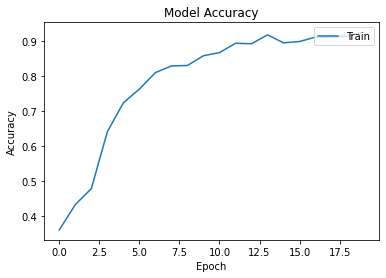

In [15]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

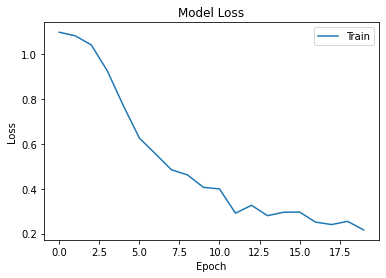

In [16]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

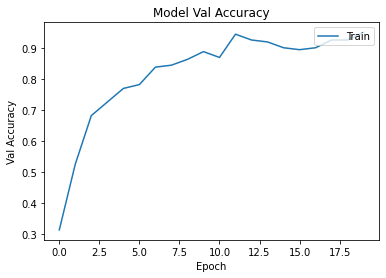

In [17]:
plt.plot(hist.history['val_accuracy'])
plt.title('Model Val Accuracy')
plt.ylabel('Val Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

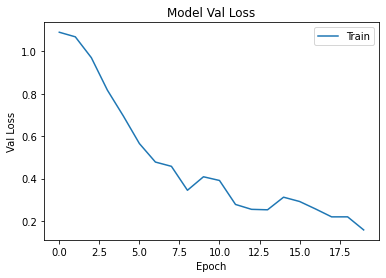

In [18]:
plt.plot(hist.history['val_loss'])
plt.title('Model Val Loss')
plt.ylabel('Val Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

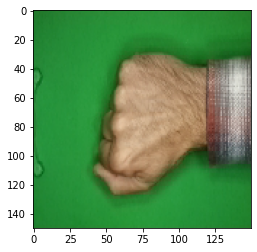

In [19]:
train_generator.class_indices
Classes = ['paper','rock','scissors']

def prepare(img_path):
  img = image.load_img(img_path, target_size=(150,150,3))
  x = image.img_to_array(img)
  x = x/255
  return np.expand_dims(x, axis=0)

test_gambar = '/tmp/rockpaperscissors/rock/01dM3ewPIsnBICu1.png'

imgs = image.load_img(test_gambar, target_size=(150, 150, 3))
plt.imshow(imgs)

In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [21]:
with tf.io.gfile.GFile('rock_paper_scissors_model.tflite', 'wb') as f:
  f.write(tflite_model)